In [1]:
#Se crea una sistema de control difuso capaz de  determinar la probabilidad
#de ser elegido como un cliente preferencial en un banco teniendo en cuenta,
#cuanto dinero tengo ahorrado en el mismo banco y el salario que gana el cliente.


In [228]:
#instalar libreria sciKitfuzzy:
!pip install scikit-fuzzy

In [229]:
#Importacion de librerias

import numpy as np
import skfuzzy as fuzz
#importar solo una funcion del paquete:
from skfuzzy import control as ctrl


In [230]:
#Programacion del control difuso

#Definir Variables de entrada(linguisticas):

#el dinero de entrada es una regla de entrada que va de 0 a mil de uno en uno
dinero_ahorro = ctrl.Antecedent(np.arange(0,601, 1),'dinero_ahorro')
salario_cliente = ctrl.Antecedent(np.arange(0,21, 1),'salario_cliente')

#Deinfir Variables de salida

probabilidad = ctrl.Consequent(np.arange(0,101, 1),'probabilidad')


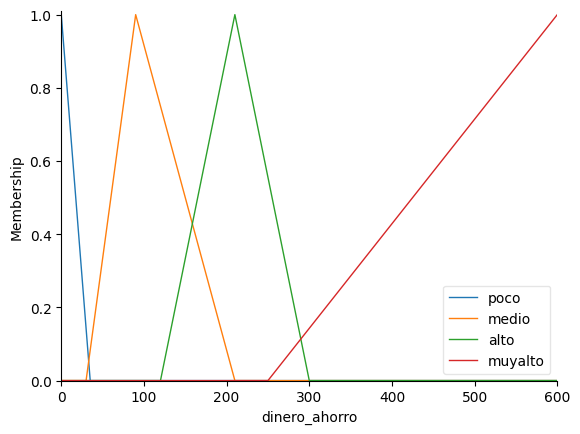

In [231]:
## Creacion de las funciones de membresia de entrada:

#Para dinero ahorrado:
dinero_ahorro['poco'] = fuzz.trimf(dinero_ahorro.universe, [0,0,35])
dinero_ahorro['medio'] = fuzz.trimf(dinero_ahorro.universe, [30,90,210])
dinero_ahorro['alto'] = fuzz.trimf(dinero_ahorro.universe, [120,210,300])
dinero_ahorro['muyalto'] = fuzz.trimf(dinero_ahorro.universe, [250,600,600])

dinero_ahorro.view()

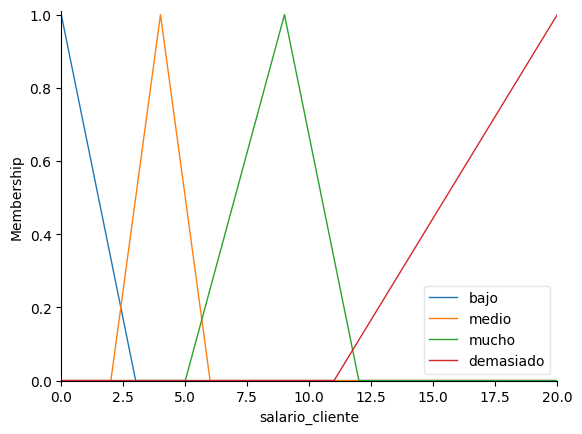

In [232]:
#Para dinero ahorrado:
salario_cliente['bajo'] = fuzz.trimf(salario_cliente.universe, [0,0,3])
salario_cliente['medio'] = fuzz.trimf(salario_cliente.universe, [2,4,6])
salario_cliente['mucho'] = fuzz.trimf(salario_cliente.universe, [5,9,12])
salario_cliente['demasiado'] = fuzz.trimf(salario_cliente.universe, [11,20,20])

salario_cliente.view()

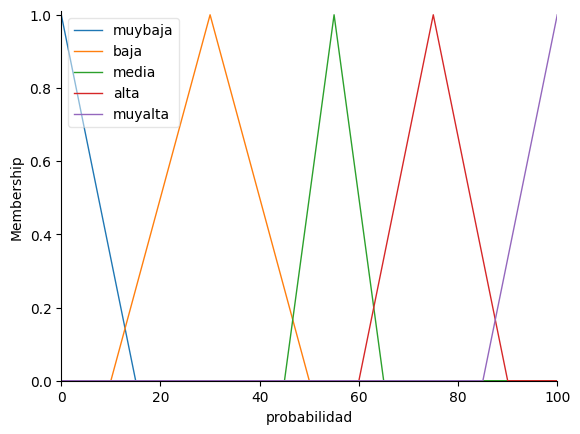

In [233]:
## Creacion de las funciones de membresia de salida:

#Para probabilidad de ser cliente preferencial:

probabilidad['muybaja'] = fuzz.trimf(probabilidad.universe, [0,0,15])
probabilidad['baja'] = fuzz.trimf(probabilidad.universe, [10,30,50])
probabilidad['media'] = fuzz.trimf(probabilidad.universe, [45,55,65])
probabilidad['alta'] = fuzz.trimf(probabilidad.universe, [60,75,90])
probabilidad['muyalta'] = fuzz.trimf(probabilidad.universe, [85,100,100])

probabilidad.view()



In [234]:
##CREAR LA TABLA DE REGLAS (REGLAS DIFUSAS)
#como la matriz queda de 4 x 4, tendremos 16 deciciones de probabilidad de ser
#elegido como preferencial

regla11 = ctrl.Rule(salario_cliente['bajo']&dinero_ahorro['poco'], probabilidad['muybaja'])
regla12 = ctrl.Rule(salario_cliente['bajo']&dinero_ahorro['medio'], probabilidad['muybaja'])
regla13 = ctrl.Rule(salario_cliente['bajo']&dinero_ahorro['alto'], probabilidad['baja'])
regla14 = ctrl.Rule(salario_cliente['bajo']&dinero_ahorro['muyalto'], probabilidad['media'])

regla21 = ctrl.Rule(salario_cliente['medio']&dinero_ahorro['poco'], probabilidad['baja'])
regla22 = ctrl.Rule(salario_cliente['medio']&dinero_ahorro['medio'], probabilidad['media'])
regla23 = ctrl.Rule(salario_cliente['medio']&dinero_ahorro['alto'], probabilidad['media'])
regla24 = ctrl.Rule(salario_cliente['medio']&dinero_ahorro['muyalto'], probabilidad['alta'])

regla31 = ctrl.Rule(salario_cliente['mucho']&dinero_ahorro['poco'], probabilidad['media'])
regla32 = ctrl.Rule(salario_cliente['mucho']&dinero_ahorro['medio'], probabilidad['media'])
regla33 = ctrl.Rule(salario_cliente['mucho']&dinero_ahorro['alto'], probabilidad['media'])
regla34 = ctrl.Rule(salario_cliente['mucho']&dinero_ahorro['muyalto'], probabilidad['alta'])

regla41 = ctrl.Rule(salario_cliente['demasiado']&dinero_ahorro['poco'], probabilidad['media'])
regla42 = ctrl.Rule(salario_cliente['demasiado']&dinero_ahorro['medio'], probabilidad['media'])
regla43 = ctrl.Rule(salario_cliente['demasiado']&dinero_ahorro['alto'], probabilidad['alta'])
regla44 = ctrl.Rule(salario_cliente['demasiado']&dinero_ahorro['muyalto'], probabilidad['muyalta'])

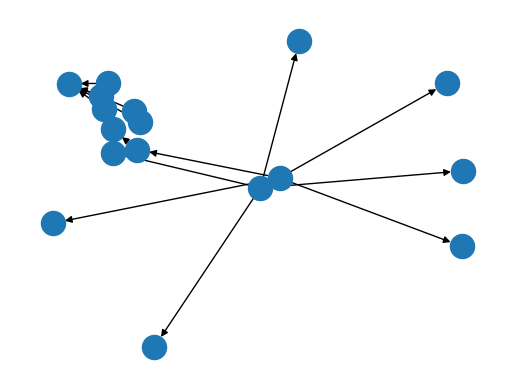

In [235]:
##Se procede a crear el sistema de control, así:
sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,

        regla21,
        regla22,
        regla23,
        regla24,

        regla31,
        regla32,
        regla33,
        regla34,

        regla41,
        regla42,
        regla43,
        regla44

    ]
)
regla41.view()
controlador = ctrl.ControlSystemSimulation(sistema_control)



In [240]:
##Como usar el controlador?
# 1 # Si Adraiana deber tener una prob de al menos
controlador.input['dinero_ahorro']=0
controlador.input['salario_cliente']=1.5

controlador.compute()

#salida

probabilidad = controlador.output['probabilidad']
print(f"La probabilidad de ser cliente preferencial es: {probabilidad}%")

La probabilidad de ser cliente preferencial es: 5.833333333333334%
